In [95]:
tf.__version__

'2.3.0'

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
# from google.colab import drive
# drive.mount('drive')

In [6]:
import os

In [7]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as mplot
import tensorflow_addons as tfa


In [8]:
from tensorflow import pad
from tensorflow.keras.layers import Layer

'''
  2D Reflection Padding
  Attributes:
    - padding: (padding_width, padding_height) tuple
'''
class ReflectionPadding2D(Layer):
    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        super(ReflectionPadding2D, self).__init__(**kwargs)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1] + 2 * self.padding[0], input_shape[2] + 2 * self.padding[1], input_shape[3])

    def call(self, input_tensor, mask=None):
        padding_width, padding_height = self.padding
        return pad(input_tensor, [[0,0], [padding_height, padding_height], [padding_width, padding_width], [0,0] ], 'REFLECT')

## Define Path Variables

In [9]:
'''
  define essential variables for the script
'''
run = 2
# path = 'drive/My Drive/Colab Notebooks/cycle_GAN/big_data/'
# current_path = 'drive/My Drive/Colab Notebooks/cycle_GAN/'
# model_path = current_path + '/models_tf/model_1'
# loss_path = os.path.join(current_path, 'losses_tf/loss_model_1')
X_path = '/big_data/monet_tf/*.tfrec'
Y_path = '/big_data/regular_tf/*.tfrec'
gcs_path = 'gs://monet_tf'
# model_path = 'models_big'
model_path = 'models_2'
cycle_weight = 10
mplot.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

## Modifiable Variables

In [57]:
batch_size = 8
data_length = 1193

In [10]:
# reg_path = 'myfolder/big_data/regular_tf'
# monet_path = 'myfolder/big_data/monet_tf'

In [11]:
# os.listdir(reg_path)

In [13]:
ckpt_path = os.path.join(gcs_path, model_path, 'save_at_run_2_{epoch}')

ckpt_path_2 = os.path.join(gcs_path, model_path)
ckpt_path_2

'gs://monet_tf/models_2'

In [14]:
monet_files = tf.io.gfile.glob(str(gcs_path + X_path))
print('Monet TFrecord Files:', len(monet_files))

Monet TFrecord Files: 5


In [15]:
regular_files = tf.io.gfile.glob(str(gcs_path + Y_path))
print('regular TFrecord Files:', len(regular_files))

regular TFrecord Files: 5


In [16]:
import tensorflow_datasets as tfds

In [17]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     # Currently, memory growth needs to be the same across GPUs
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Memory growth must be set before GPUs have been initialized
#     print(e)

In [18]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)


Device: grpc://10.126.194.98:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.126.194.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.126.194.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of replicas: 8


In [19]:

# file_loader = file_load()

# monet_img = file_loader.get_img(monet_path)

# reg_img = file_loader.get_img(reg_path)

### Create Dataset iterators
Creat tensorflow.data.Dataset API for input pipeline

### Preprocess the image

1) Convert them to -1 to 1 scale

2) Convert them to tensor

3) Random Crop

4) random flip

In [20]:
'''
return list of all tfrecord files
'''

# def get_list(path):
#   file_list = []
#   for file in os.listdir(path):
#     file_path = path + file  
#     file_list.append(file_path)
#   return file_list

# regular_list = get_list(reg_path)
# monet_list = get_list(monet_path)


'\nreturn list of all tfrecord files\n'

In [21]:
'''
  denormalize the array: remove the additional axis and change range to 0-1
'''

def de_normalize(img):
  img = np.squeeze(img, axis=0)
  img = (img+1)/2
  return img

In [22]:
'''
  change scale to -1 to 1, apply random jitter and flip
'''
def process_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.image.resize(image, [286, 286], 
                            method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    image = tf.image.random_crop(image, size = [256, 256, 3])

    image = tf.image.random_flip_left_right(image)
    return image

In [23]:
def read_tfrecord(example):
    tfrecord_format = {
        'image':      tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = process_image(example['image'])
    return image

def load_dataset(filenames):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls= tf.data.experimental.AUTOTUNE)
    return dataset

def get_gan_dataset(monet_files, photo_files, augment=None, repeat=True, shuffle=True, batch_size=8):

    monet_ds = load_dataset(monet_files)
    photo_ds = load_dataset(photo_files)

    if repeat:
        monet_ds = monet_ds.repeat()
        photo_ds = photo_ds.repeat()
    if shuffle:
        monet_ds = monet_ds.shuffle(1193)
        photo_ds = photo_ds.shuffle(1193)
        
    monet_ds = monet_ds.batch(batch_size, drop_remainder=True)
    photo_ds = photo_ds.batch(batch_size, drop_remainder=True)
    monet_ds = monet_ds.cache()
    photo_ds = photo_ds.cache()
    monet_ds = monet_ds.prefetch(tf.data.experimental.AUTOTUNE)
    photo_ds = photo_ds.prefetch(tf.data.experimental.AUTOTUNE)
    
    
    return monet_ds, photo_ds

In [24]:
monet_iterator, regular_iterator = get_gan_dataset(monet_files, regular_files, batch_size)

In [25]:
dataset_iterator = tf.data.Dataset.zip((monet_iterator, regular_iterator))

In [26]:
def show_img():
  fix, (ax1, ax2) = mplot.subplots(1,2)
  monet = np.expand_dims(next(iter(monet_iterator))[0], 0)
  regular = np.expand_dims(next(iter(regular_iterator))[0], 0)
  ax1.imshow(de_normalize(monet))
  ax2.imshow(de_normalize(regular))
  mplot.show()

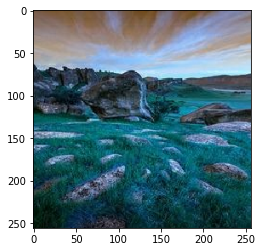

In [27]:
sample_regular = next(iter(regular_iterator))[0]
sample_regular = np.expand_dims(sample_regular, axis=0)
mplot.imshow(de_normalize(sample_regular))

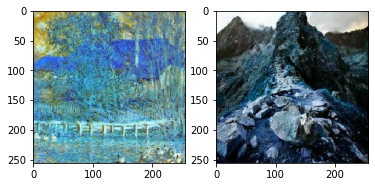

In [28]:
show_img()

In [29]:
# sample_regular = regular_img[np.random.randint(0,1000)]
# mplot.imshow(de_normalize(sample_regular))

In [30]:
# sample_regular.shape

In [31]:
monet_iterator

<PrefetchDataset shapes: (8, 256, 256, 3), types: tf.float32>

##Define Network
Define all the components of the GAN

1) Downscale Generator

2) Resnet

3) Upscale Generator

4) PatchGAN Discriminator

In [32]:
from tensorflow.keras.layers import Input, Conv2D, Activation,Add, LeakyReLU, Conv2DTranspose, ZeroPadding2D
from tensorflow.keras.models import Model


In [33]:
def pre_convolutional_block(input_layer):
    gaussian = tf.random_normal_initializer(0,0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    # x = ReflectionPadding2D((3,3), name='Ref_first')(input_layer)
    x = ZeroPadding2D((3,3), name='Ref_first')(input_layer)
    
    x = Conv2D(filters=64, padding='valid', kernel_size=(7,7), strides=(1,1), kernel_initializer=gaussian, name='conv1_pre')(x)
    x = tfa.layers.InstanceNormalization(axis=-1, gamma_initializer = gamma_init)(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=128, padding='same', kernel_size=(3,3), strides=(2,2), kernel_initializer=gaussian, name='conv2_pre')(x)
    x = tfa.layers.InstanceNormalization(axis=-1, gamma_initializer = gamma_init)(x)
    x = Activation('relu')(x)
    
    x = Conv2D(filters=256, padding='same', kernel_size=(3,3), strides=(2,2), kernel_initializer=gaussian, name='conv3_pre')(x)
    x = tfa.layers.InstanceNormalization(axis=-1, gamma_initializer = gamma_init)(x)
    x = Activation('relu')(x)
    
    return x

    

In [34]:
def R256(input_layer, res_position, f=256, k=(3,3), s=(1,1)):
    gaussian = tf.random_normal_initializer(0,0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    # x = ReflectionPadding2D((1,1))(input_layer)
    x = ZeroPadding2D((1,1))(input_layer)
    x = Conv2D(filters=f, kernel_size=k, padding='valid', strides=s, name='res'+str(res_position)+'a', kernel_initializer=gaussian)(x)
    x = tfa.layers.InstanceNormalization(axis=-1, gamma_initializer = gamma_init)(x)
    x = Activation('relu')(x)

    # x = ReflectionPadding2D((1,1))(x)
    x = ZeroPadding2D((1,1))(x)

    x = Conv2D(filters=f, kernel_size=k, padding='valid', strides=s, name='res'+str(res_position)+'b', kernel_initializer=gaussian)(x)
    x = tfa.layers.InstanceNormalization(axis=-1, gamma_initializer = gamma_init)(x)
    
    x = Add(name = 'res'+str(res_position)+'final')([input_layer, x])
    
    return x
    
    

In [35]:
def post_convolutional_block(input_layer):
    gaussian = tf.random_normal_initializer(0,0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    x = Conv2DTranspose(filters=128, kernel_size=(3,3), padding='same', strides=(2, 2), kernel_initializer=gaussian, name='conv1_post')(input_layer)
    x = tfa.layers.InstanceNormalization(axis=-1, gamma_initializer = gamma_init)(x)
    x = Activation('relu')(x)
    
    x = Conv2DTranspose(filters=64, kernel_size=(3,3), padding='same', strides=(2, 2), kernel_initializer=gaussian, name='conv2_post')(x)
    x = tfa.layers.InstanceNormalization(axis=-1, gamma_initializer = gamma_init)(x)
    x = Activation('relu')(x)

    # x = ReflectionPadding2D(padding=(3,3), name='Ref_last')(x)
    x = ZeroPadding2D(padding=(3,3), name='Ref_last')(x)
    x = Conv2D(filters=3, kernel_size=(7,7), padding='valid', strides=(1, 1), kernel_initializer=gaussian, name='conv3_post')(x)
    x = Activation('tanh', name='tanh_activation')(x)
    
    return x

In [36]:
def make_generator(input_shape, name='generator_model'):
    
    input_layer = Input(input_shape)
    x = pre_convolutional_block(input_layer)
    x = R256(x, 1)
    x = R256(x,2)
    x = R256(x,3)
    x = R256(x, 4)
    x = R256(x,5)
    x = R256(x,6)
    x = R256(x, 7)
    x = R256(x,8)
    x = R256(x,9)
    x = post_convolutional_block(x)
    
    model = Model(inputs=input_layer, outputs=x, name=name)
    return model

In [37]:
monet_shape = (256, 256, 3)
regular_shape = (256, 256, 3)

In [38]:
with strategy.scope():
  generator_M = make_generator(regular_shape, name='regular_to_monet_generator')
  generator_R = make_generator(monet_shape, name = 'monet_to_regular_generator')

In [39]:
generator_M.summary()

Model: "regular_to_monet_generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Ref_first (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pre (Conv2D)              (None, 256, 256, 64) 9472        Ref_first[0][0]                  
__________________________________________________________________________________________________
instance_normalization (Instanc (None, 256, 256, 64) 128         conv1_pre[0][0]                  
_________________________________________________________________________

In [40]:
generator_R.summary()

Model: "monet_to_regular_generator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Ref_first (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_pre (Conv2D)              (None, 256, 256, 64) 9472        Ref_first[0][0]                  
__________________________________________________________________________________________________
instance_normalization_23 (Inst (None, 256, 256, 64) 128         conv1_pre[0][0]                  
_________________________________________________________________________

In [41]:
def make_discriminator(input_shape, name='disc_model'):
    gaussian = tf.random_normal_initializer(0,0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    input_layer = Input(input_shape)
    x = Conv2D(filters=64, kernel_size=(4,4), padding='same', strides=(2,2), name='disc_conv_1', kernel_initializer=gaussian)(input_layer)
    x = LeakyReLU(0.2)(x)
    
    x = Conv2D(filters=128, kernel_size=(4,4), padding='same', strides=(2,2), name='disc_conv_2', kernel_initializer=gaussian)(x)
    x = tfa.layers.InstanceNormalization(axis=-1, gamma_initializer = gamma_init)(x)
    x = LeakyReLU(0.2)(x)
    
    x = Conv2D(filters=256, kernel_size=(4,4), padding='same', strides=(2,2), name='disc_conv_3', kernel_initializer=gaussian)(x)
    x = tfa.layers.InstanceNormalization(axis=-1, gamma_initializer = gamma_init)(x)
    x = LeakyReLU(0.2)(x)
    
    x = Conv2D(filters=512, kernel_size=(4,4), padding='same', strides=(1,1), name='disc_conv_4', kernel_initializer=gaussian)(x)
    x = tfa.layers.InstanceNormalization(axis=-1, gamma_initializer = gamma_init)(x)
    x = LeakyReLU(0.2)(x)


    
    x = Conv2D(filters=1, kernel_size=(4,4), padding='same', strides=(1,1), name='disc_conv_final', kernel_initializer=gaussian)(x)

    
    return Model(inputs=input_layer, outputs=x, name=name)
    
    
    

In [42]:
regular_shape = (256,256,3)
monet_shape  = (256, 256, 3)

with strategy.scope():
  discriminator_monet = make_discriminator(regular_shape, name='monet_recognizer')
  discriminator_regular = make_discriminator(monet_shape, name='regular_recognizer')

In [43]:
discriminator_monet.summary()

Model: "monet_recognizer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
disc_conv_1 (Conv2D)         (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 64)      0         
_________________________________________________________________
disc_conv_2 (Conv2D)         (None, 64, 64, 128)       131200    
_________________________________________________________________
instance_normalization_46 (I (None, 64, 64, 128)       256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
disc_conv_3 (Conv2D)         (None, 32, 32, 256)  

In [44]:
discriminator_regular.summary()

Model: "regular_recognizer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
disc_conv_1 (Conv2D)         (None, 128, 128, 64)      3136      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128, 128, 64)      0         
_________________________________________________________________
disc_conv_2 (Conv2D)         (None, 64, 64, 128)       131200    
_________________________________________________________________
instance_normalization_49 (I (None, 64, 64, 128)       256       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
disc_conv_3 (Conv2D)         (None, 32, 32, 256)

## Define Loss Functions

### Discriminator loss
The discriminator tries to do two things. It tries to maximize the values obtained from real image and minimize values obtained from fake images.
Therefore it minimizes (1 - real) + (fake - 0)

### Generator loss
The generator tries to maximize the value obtained by discriminator for the fake image. Therefore it minimizes (1-fake)

In [45]:
#all different losses
with strategy.scope():
  bin_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE )

  def discriminator_loss(real, fake):
      real_loss = bin_loss(tf.ones_like(real), real)
      gen_loss = bin_loss(tf.zeros_like(fake), fake)
      
      disc_loss = (real_loss + gen_loss) * 0.5
      
      return disc_loss

  def generator_loss(fake):
      gen_loss = bin_loss(tf.ones_like(fake), fake)
      
      return gen_loss
      
  def identity_loss(real, identity_real, weight):
      id_loss = 0.5 * weight * tf.reduce_mean(tf.abs(real - identity_real))
      
      return id_loss

  def cycle_loss(real, cycled, weight):
      cyc_loss =  weight * tf.reduce_mean(tf.abs(real - cycled)) 
      
      return cyc_loss

### Define Optimizers
Using Adam Optimizer with learning rate of 0.0002

In [46]:
with strategy.scope():
  #generator that takes real image to monet image
  gen_m_opt = tf.keras.optimizers.Adam(0.0002, beta_1=0.5)
  #generator that takes monet image to real image
  gen_r_opt = tf.keras.optimizers.Adam(0.0002, beta_1=0.5)

  #discriminator that classifies monet as True
  disc_m_opt = tf.keras.optimizers.Adam(0.0002, beta_1=0.5)
  #discriminator that classifies regular images as true
  disc_r_opt = tf.keras.optimizers.Adam(0.0002, beta_1=0.5) 

### Generate Samples to track training

Take the same image for input and translate it every few epochs to see progress

In [47]:
def generate_test():
  fig, (ax1, ax2) = mplot.subplots(1,2)
  monet_sample = generator_M(sample_regular)
  ax1.imshow(de_normalize(sample_regular))
  ax2.imshow(de_normalize(monet_sample))
  mplot.show()
  

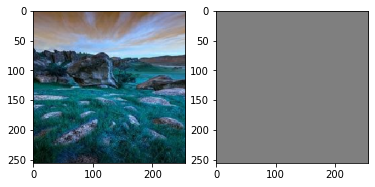

In [48]:
generate_test()
# def track_progress(epoch=0):
#   print('Results for epoch {}'.format(epoch))
#   mon_sample_gen = generator_M(sample_regular)
#   reg_sample_img = de_normalize(sample_regular)
#   mon_sample_gen = de_normalize(mon_sample_gen)
#   fig, (ax1, ax2) = mplot.subplots(1,2)
#   ax1.imshow(reg_sample_img)
#   ax2.imshow(mon_sample_gen)
#   mplot.show()



### Checkpoints
Starting a checkpoint and a checkpoint manager to allow training in different intervals.


**Always run before training unless starting from a fresh checkpoint**

In [49]:
with strategy.scope():
  ckpt = tf.train.Checkpoint(generator_M = generator_M, generator_R = generator_R,
                           discriminator_monet = discriminator_monet, discriminator_regular = discriminator_regular,
                           gen_m_opt = gen_m_opt, gen_r_opt=gen_r_opt, disc_m_opt = disc_m_opt, disc_r_opt = disc_r_opt
                           )

  ckpt_manager = tf.train.CheckpointManager(ckpt, directory= ckpt_path_2, max_to_keep=15)

  if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print('Restored', ckpt_manager.latest_checkpoint)
  # ckpt = tf.keras.callbacks.ModelCheckpoint(ckpt_path, save_best_only = False, save_weights_only=True, save_freq='epoch')



Restored gs://monet_tf/models_2/ckpt-25


In [50]:
class CustomCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      generate_test()
      if((epoch+1)%2 == 0):
        ckpt_manager.save()

In [51]:
class CycleGan(Model):
    def __init__(
        self,
        monet_generator,
        photo_generator,
        monet_discriminator,
        photo_discriminator,
        lambda_cycle=10,
    ):
        super(CycleGan, self).__init__()
        self.generator_M = monet_generator
        self.generator_R = photo_generator
        self.discriminator_monet = monet_discriminator
        self.discriminator_regular = photo_discriminator
        self.cycle_weight = lambda_cycle
        
    def compile(
        self,
        m_gen_optimizer,
        p_gen_optimizer,
        m_disc_optimizer,
        p_disc_optimizer,
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn
    ):
        super(CycleGan, self).compile()
        self.gen_m_opt = m_gen_optimizer
        self.gen_r_opt = p_gen_optimizer
        self.disc_m_opt = m_disc_optimizer
        self.disc_r_opt = p_disc_optimizer
        self.generator_loss = gen_loss_fn
        self.discriminator_loss = disc_loss_fn
        self.cycle_loss = cycle_loss_fn
        self.identity_loss = identity_loss_fn

    def train_step(self, batch_data):

      t_monet, t_regular = batch_data
    
      with tf.GradientTape(persistent=True) as tape:
          fake_monet = self.generator_M(t_regular, training=True)
          cycle_regular = self.generator_R(fake_monet, training=True)

          #turning monet img to  regualr and cycle back to monet
          fake_regular = self.generator_R(t_monet, training=True)
          cycle_monet = self.generator_M(fake_regular, training=True)

          #taking a monet and generate monet using monet generator
          identity_monet = self.generator_M(t_monet, training=True)

          #taking a regular image and generate a regular using regular generator
          identity_regular = self.generator_R(t_regular, training=True)

          pred_real_monet = self.discriminator_monet(t_monet, training=True)
          pred_fake_monet = self.discriminator_monet(fake_monet, training=True)

          pred_real_regular = self.discriminator_regular(t_regular, training=True)
          pred_fake_regular = self.discriminator_regular(fake_regular, training=True)

          #discriminator losses
          monet_disc_loss = self.discriminator_loss(pred_real_monet, pred_fake_monet)
          regular_disc_loss = self.discriminator_loss(pred_real_regular, pred_fake_regular)

          #identity losses
          monet_identity_loss = self.identity_loss(t_monet, identity_monet, self.cycle_weight)
          regular_identity_loss = self.identity_loss(t_regular, identity_regular, self.cycle_weight)

          #cyclic loss
          monet_cyclic_loss = self.cycle_loss(t_monet, cycle_monet, self.cycle_weight)
          regular_cyclic_loss = self.cycle_loss(t_regular, cycle_regular, self.cycle_weight)

          #generator loss
          generator_monet_loss = self.generator_loss(pred_fake_monet)
          generator_regular_loss = self.generator_loss(pred_fake_regular)


          total_cyclic_loss = monet_cyclic_loss + regular_cyclic_loss

          #total generator losses
          total_gen_monet_loss = generator_monet_loss + total_cyclic_loss + monet_identity_loss
          total_gen_regular_loss = generator_regular_loss + total_cyclic_loss + regular_identity_loss

      #generator gradients
      gen_monet_gradient = tape.gradient(total_gen_monet_loss, self.generator_M.trainable_variables)
      gen_regular_gradient = tape.gradient(total_gen_regular_loss, self.generator_R.trainable_variables)

      #discriminator gradients
      disc_monet_gradient = tape.gradient(monet_disc_loss, self.discriminator_monet.trainable_variables)
      disc_regular_gradient = tape.gradient(regular_disc_loss, self.discriminator_regular.trainable_variables)

      #apply gradients to optimizer
      gen_m_opt.apply_gradients(zip(gen_monet_gradient, self.generator_M.trainable_variables))
      gen_r_opt.apply_gradients(zip(gen_regular_gradient, self.generator_R.trainable_variables))

      disc_m_opt.apply_gradients(zip(disc_monet_gradient, self.discriminator_monet.trainable_variables))
      disc_r_opt.apply_gradients(zip(disc_regular_gradient, self.discriminator_regular.trainable_variables))

      total_losses = total_gen_monet_loss+total_gen_regular_loss + monet_disc_loss + regular_disc_loss         
          
      return {'total_losses':total_losses, 'monet_disc_loss':monet_disc_loss, 'regular_disc_loss':regular_disc_loss, 'monet_gen_loss': total_gen_monet_loss, 'regular_gen_loss':total_gen_regular_loss, 'total_cyclic_loss': total_cyclic_loss}




In [52]:
# def train_CGAN(t_monet, t_regular, cycle_weight):
    
#     with tf.GradientTape(persistent=True) as tape:
#         fake_monet = generator_M(t_regular, training=True)
#         cycle_regular = generator_R(fake_monet, training=True)

#         #turning monet img to  regualr and cycle back to monet
#         fake_regular = generator_R(t_monet, training=True)
#         cycle_monet = generator_M(fake_regular, training=True)

#         #taking a monet and generate monet using monet generator
#         identity_monet = generator_M(t_monet, training=True)

#         #taking a regular image and generate a regular using regular generator
#         identity_regular = generator_R(t_regular, training=True)

#         pred_real_monet = discriminator_monet(t_monet, training=True)
#         pred_fake_monet = discriminator_monet(fake_monet, training=True)

#         pred_real_regular = discriminator_regular(t_regular, training=True)
#         pred_fake_regular = discriminator_regular(fake_regular, training=True)

#         #discriminator losses
#         monet_disc_loss = discriminator_loss(pred_real_monet, pred_fake_monet)
#         regular_disc_loss = discriminator_loss(pred_real_regular, pred_fake_regular)

#         #identity losses
#         monet_identity_loss = identity_loss(t_monet, identity_monet, cycle_weight)
#         regular_identity_loss = identity_loss(t_regular, identity_regular, cycle_weight)

#         #cyclic loss
#         monet_cyclic_loss = cycle_loss(t_monet, cycle_monet, cycle_weight)
#         regular_cyclic_loss = cycle_loss(t_regular, cycle_regular, cycle_weight)

#         #generator loss
#         generator_monet_loss = generator_loss(pred_fake_monet)
#         generator_regular_loss = generator_loss(pred_fake_regular)


#         total_cyclic_loss = monet_cyclic_loss + regular_cyclic_loss

#         #total generator losses
#         total_gen_monet_loss = generator_monet_loss + total_cyclic_loss + monet_identity_loss
#         total_gen_regular_loss = generator_regular_loss + total_cyclic_loss + regular_identity_loss

#     #generator gradients
#     gen_monet_gradient = tape.gradient(total_gen_monet_loss, generator_M.trainable_variables)
#     gen_regular_gradient = tape.gradient(total_gen_regular_loss, generator_R.trainable_variables)

#     #discriminator gradients
#     disc_monet_gradient = tape.gradient(monet_disc_loss, discriminator_monet.trainable_variables)
#     disc_regular_gradient = tape.gradient(regular_disc_loss, discriminator_regular.trainable_variables)

#     #apply gradients to optimizer
#     gen_m_opt.apply_gradients(zip(gen_monet_gradient, generator_M.trainable_variables))
#     gen_r_opt.apply_gradients(zip(gen_regular_gradient, generator_R.trainable_variables))

#     disc_m_opt.apply_gradients(zip(disc_monet_gradient, discriminator_monet.trainable_variables))
#     disc_r_opt.apply_gradients(zip(disc_regular_gradient, discriminator_monet.trainable_variables))

#     total_losses = total_gen_monet_loss+total_gen_regular_loss + monet_disc_loss + regular_disc_loss         
        
#     return {'total_losses':[total_losses], 'monet_disc_loss':[monet_disc_loss], 'regular_disc_loss':[regular_disc_loss], 'monet_gen_loss': [total_gen_monet_loss], 'regular_gen_loss':[total_gen_regular_loss], 'total_cyclic_loss': total_cyclic_loss}      
        

In [53]:
with strategy.scope():
  cycleGAN_model = CycleGan(generator_M, generator_R, discriminator_monet, discriminator_regular, 10)

  cycleGAN_model.compile(m_gen_optimizer = gen_m_opt, p_gen_optimizer = gen_r_opt, m_disc_optimizer = disc_m_opt, p_disc_optimizer = disc_r_opt,
                         gen_loss_fn = generator_loss, disc_loss_fn = discriminator_loss,
                         cycle_loss_fn = cycle_loss, identity_loss_fn = identity_loss)

### Load checkpoint
Load the previous saved model to the cycleGAN model

In [54]:
# latest_weights =  tf.io.gfile.glob(str(gcs_path + '/models_big/'))

In [55]:
# with strategy.scope():
#   # cycleGAN_model.load_weights('gs://monet_tf/models_big/save_at_3')
#   tf.train.Checkpoint.restore(save_path = 'gs://monet_tf/models_big/save_at_3')

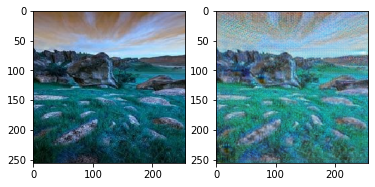

In [56]:
generate_test()

In [56]:
train_steps = data_length // batch_size


In [57]:
train_steps

149

In [ ]:
history = cycleGAN_model.fit(dataset_iterator, steps_per_epoch = train_steps,
                               epochs = 50,
                             callbacks = [CustomCallBack()], 
                               verbose = 1)                               

In [ ]:
'''
  Defining pre requisites for the training loop
'''

run=1
epochs = 100
all_losses_list = ['total_losses', 'monet_disc_loss', 'regular_disc_loss', 'monet_gen_loss', 'regular_gen_loss', 'total_cyclic_loss']      
all_losses_df = pd.DataFrame(columns=all_losses_list)
epoch_loss = [] 
steps = len(monet_img)



In [ ]:

# for epoch in range(epochs):
#     step_loss = pd.DataFrame(columns = all_losses_list)
#     print('Epoch {}:'.format(epoch+1))
#     for i, (one_monet, one_regular) in enumerate(zip(monet_iterator, regular_iterator)):
#         if((i+1)%10 == 0):
#             print('\r','Step {}/{} completed'.format(i+1, steps), end='')
        
#         # dictionary returned from my train_CGAN function for one step
#         losses = train_CGAN(one_monet, one_regular, 10)

#         #dataframe with losses for each step in one epoch
#         step_loss = pd.concat([step_loss, pd.DataFrame(losses)], ignore_index=True)

    
    
#     #Things to happen every epoch: 1)calculate mean loss 2)append to the all_losses_df
#     mean_losses = step_loss.mean()
#     #dictionary of mean of all losses for one epoch
#     mean_dictionary = {'total_losses': [mean_losses[0]], 'monet_disc_loss':[mean_losses[1]], 'regular_disc_loss':[mean_losses[2]], 'monet_gen_loss': [mean_losses[3]], 'regular_gen_loss':[mean_losses[4]], 'total_cyclic_loss': [mean_losses[5]]} 
#     #df with mean loss of every epoch
#     all_losses_df = pd.concat([all_losses_df, pd.DataFrame(mean_dictionary)], ignore_index=True)     
    
#     total_loss = mean_losses['total_losses']
#     cyclic_loss = mean_losses['total_cyclic_loss']

#     print('\t total_cyclic_loss: {} \t total_loss:{} '.format(cyclic_loss, total_loss))
    
#     track_progress(epoch+1)
#     # Things to happen each 5 epochs: 1) save checkpoint 2) save loss csv
#     if ((epoch+1)%2 == 0):
#       all_losses_df.to_csv(loss_path + "/loss_{}_{}.csv".format(epoch+1,run))
#       ckpt_manager.save()
#       print('Saved at epoch {}'.format(epoch))
#       print()
    

### Evaluation
This portion covers the evaluation of the model


In [60]:
def translate_image(original_img, target_domain):
  if (len(original_img.shape) == 3):
    original_img = np.expand_dims(original_img, axis=0)

  if (target_domain == 'monet'):
    prediction_array = generator_M(original_img)
  elif (target_domain == 'regular'):
    prediction_array = generator_R(original_img)
  
  return prediction_array

In [92]:
store_path = 'gs://monet_tf/final_model'

In [1]:
def random_trial():
  test_img = next(iter(regular_iterator))[np.random.randint(0,8)]
  test_img = np.expand_dims(test_img, axis=0)
  translated_img = translate_image(test_img, 'monet')
  fig, (ax1,ax2) = mplot.subplots(1,2)
  print(np.min(translated_img))
  ax1.imshow(de_normalize(test_img))
  ax2.imshow(de_normalize(translated_img))
  # mplot.savefig(store_path)
  mplot.show()


In [2]:
random_trial()

NameError: ignored

In [94]:
generator_M.save(store_path)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


INFO:tensorflow:Assets written to: gs://monet_tf/final_model/assets


INFO:tensorflow:Assets written to: gs://monet_tf/final_model/assets
